<a href="https://colab.research.google.com/github/AAndreo/data-science/blob/main/Deteccao_Fraude_Cartao_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito utilizando Machine Learning

<center><img width="60%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/fraude.jpg"></center>

Imagem de <a href="https://br.freepik.com/vetores-gratis/roubar-o-conceito-de-ataque-cibernetico-de-dados_7970626.htm#query=credit%20card%20fraud&position=33&from_view=search&track=ais">Freepik</a>

No Brasil em 2022 registrou R$5,8 bilhões em tentativas de fraudes. Segundo dados da ClearSale, empresa especialista em prevenção e gerenciamento de risco, o mapa da fraude revelou 5,6 milhões de tentativas no período de 1º de janeiro a 31 de dezembro. O estudo analisou 312,2 milhões de pedidos no e-commerce brasileiro, feitos via pagamento por cartão de crédito. Em comparação com o ano anterior, as tentativas de fraude apresentaram uma queda de 0,3%, mas os valores ainda foram 4,8% maiores do que em 2021.

Sobre as regiões, assim como no ano anterior, a região Norte segue na dianteira, com o maior índice de tentativas de fraude sobre a quantidade total de transações, sendo 3,4%. Ela também é a primeira no ranking do ticket médio da tentativa de fraude com o valor de R$1.420,00. Seguida pelo Nordeste (2,8%); Centro Oeste (2,5%), Sudeste (2,1%) e Sul (1,1%).

A detecção de fraudes em cartões de crédito é um campo crucial para a segurança financeira dos consumidores e das instituições financeiras. As fraudes em cartões de crédito ocorrem quando atividades não autorizadas são realizadas em uma conta de cartão de crédito, resultando em perdas financeiras para os titulares dos cartões ou para os emissores dos cartões.


***Nosso problema neste estudo?***
* Transações fraudulentas com cartões de crédito.

***Qual o nosso objetivo?***
* Identificar essas transações de forma eficaz.

***Como?***
* Criando e aperfeiçoando mecanismos eficientes, através da análise exploratória dos dados disponibilizados e modelos de machine learning. Além disso, para a avaliação da eficácia dos modelos construidos, analisar os resultados de métricas que garantam precisão na detecçao de fraudes e quantidade de falsos negativos.

### **Obtenção dos Dados**

Esse [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) contem dados anonimos de operações realizadas por cartões de crédito, no periodo de Setembro de 2013, por titulares de cartões europeus. Os registros apresentam 284.807 transações realizadas em dois dias, onde ocorreram 492 fraudes.
As features independentes são todas numéricas, onde a sua grande maioria é o resultado de uma transformação PCA.

A análise de componentes principais (PCA) é uma técnica que transforma dados de alta dimensão em dimensões inferiores, mantendo o máximo de informações possível.

Por questões de segurança e confidencialidade, não foram fornecidos os dados originais, bem como, mais informações sobre os mesmos.
As features que são representadas por V1, V2, V3, ... V28, são as que sofreram a transformação pelo processo PCA.

As features que não foram transformadas:
* Time
* Amount

Este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

As features Time que  e Amount que é o valor da transação, não foram transformadas.


**Dicionário de dados**

* Time:  contem os segundos decorridos entre cada transação e a primeira transação registrada no conjunto de dados.
* V1, V2, V3, ... V28:  variáveis que passaram pelo processo de PCA.
* Amount: é o valor da transação.
* Class: variável alvo, contendo os registros de 0 para transações legítimas e 1 para casos de fraude.

**Importando os dados e Bibliotecas**

In [ ]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids


In [ ]:
# Configuração do ambiente
pd.set_option('display.max_rows', 50)
# pd.options.display.float_format = '{:.5f}'.format
sns.set_theme(style="dark")
%matplotlib inline

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

title_color = '#515151'
subtitle_color = '#9E9E9E'
title_font = {'fontsize': 16, 'fontweight' : 'bold'}

cor_normal = sns.color_palette("tab10",n_colors=4)[2:3]
cor_fraude = sns.color_palette("tab10",n_colors=4)[3:]

In [ ]:
path = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'
df_ccard = pd.read_csv(path)

### **Análise exploratória de dados**

<center><img width="60%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/EDA_1.png"></center>

É uma abordagem para analisar os dados para:
* Obter melhor compreensão do conjunto de dados.
* Porcentagem de itens nulos
* Verificação dos data types
* Verificação da existência de outliers
* Extrair importantes insights para o problema que estamos tentando resolver.

In [ ]:
# Mostrar os cinco primeiros registros
df_ccard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Quantidade de registros e colunas do dataframe
print(f'Nosso dataframe possui {df_ccard.shape[0]} linhas e {df_ccard.shape[1]} colunas.')

Nosso dataframe possui 284807 linhas e 31 colunas.


In [ ]:
# Verificação dos data types
df_ccard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

**Verificação de dados ausentes**

In [ ]:
# Análise dos dados ausentes
dados_ausentes = {col: df_ccard[col].isna().sum().astype('str') + ' => ' + ((df_ccard[col].isna().sum() / df_ccard[col].shape[0]) * 100).round(2).astype('str') +
                  '%' for col in df_ccard.columns.values.tolist()}
dados_ausentes = pd.DataFrame(dados_ausentes.items(), columns=['Coluna', 'Valores ausentes => Percentual Total'])
dados_ausentes

,Coluna,Valores ausentes => Percentual Total
0,Time,0 => 0.0%
1,V1,0 => 0.0%
2,V2,0 => 0.0%
3,V3,0 => 0.0%
4,V4,0 => 0.0%
5,V5,0 => 0.0%
6,V6,0 => 0.0%
7,V7,0 => 0.0%
8,V8,0 => 0.0%
9,V9,0 => 0.0%


In [ ]:
# Resumo estatistico
df_ccard.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,...,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,...,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,...,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,...,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,...,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


Nesse resumo podemos verificar que a variável Amount, casos de transações legítimas e fraude estão contabilizadas juntamente, possuindo o valor máximo de 25.691,16, porém 75% das transações estão abaixo de 77,00 e seu valor médio é de 88,34.

Isso mostra que a grande maioria das transações são de valores baixos e também pode sinalizar a presença de outliers. Em relação as demais variáveis (V1…V28 e Time), os valores aparentemente estão dentro de uma normalidade.

In [ ]:
# Distribuição da variável Class
df_ccard['Class'].value_counts().to_frame(name='Transações')


,Transações
0,284315
1,492


In [ ]:
print(f"A variável Class está distribuida da seguinte forma: {df_ccard['Class'].value_counts()[0]} registros de transações legítimas e {df_ccard['Class'].value_counts()[1]} transações com fraude.")
print(f"O número de Transações Legítimas representam {(df_ccard['Class'].value_counts()[0] / df_ccard.shape[0]) * 100:.2f}% do total de registros.")
print(f"O número de fraudes representam {(df_ccard['Class'].value_counts()[1] / df_ccard.shape[0]) * 100:.2f}% do total de registros.")

A variável Class está distribuida da seguinte forma: 284315 registros de transações legítimas e 492 transações com fraude.
O número de Transações Legítimas representam 99.83% do total de registros.
O número de fraudes representam 0.17% do total de registros.


Text(0.85, 550, '0.17% (492)')

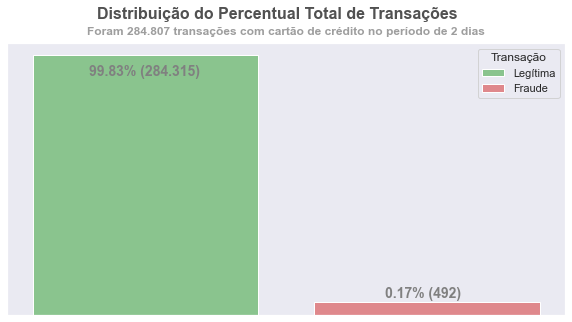

In [ ]:
# Grafico Distribuição do Percentual Total de Transações
n_bins = np.histogram_bin_edges(df_ccard['Class'], bins=1)
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.histplot(data=df_ccard, x='Class', stat='count', discrete=(True,True), bins=n_bins, log_scale=(False,True), hue='Class', hue_order=[0,1], palette=sns.color_palette("tab10",n_colors=4)[2:], shrink=.8)

fig.suptitle('Distribuição do Percentual Total de Transações', color=title_color, ha='center',  fontweight='bold', fontsize=16)
ax.set_title('Foram 284.807 transações com cartão de crédito no período de 2 dias', color=subtitle_color, fontweight='bold', fontsize=12, ha='center', va='bottom')
ax.set_xticklabels(labels='')
ax.set_yticklabels(labels='')
ax.set_xlabel('')
ax.set_ylabel('')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Legítima','Fraude'], title='Transação')

# Coloca os valores dos percentuais nas barras correspondentes
ax.annotate('99.83% (284.315)', xy=(-0.2, 170000), color='gray', fontsize=14, fontweight='bold')
ax.annotate('0.17% (492)', xy=(0.85, 550), color='gray', fontsize=14, fontweight='bold')



No gráfico acima, fica nitido o quanto nosso dataset está desbalanceado. Durante o nosso processo, realizaremos o balanceamento, para que a classe majoritária de transações legítimas (Class = 0), não seja privilegiada.

Text(0.5, 1.0, 'Distribuição dos Valores por Transação')

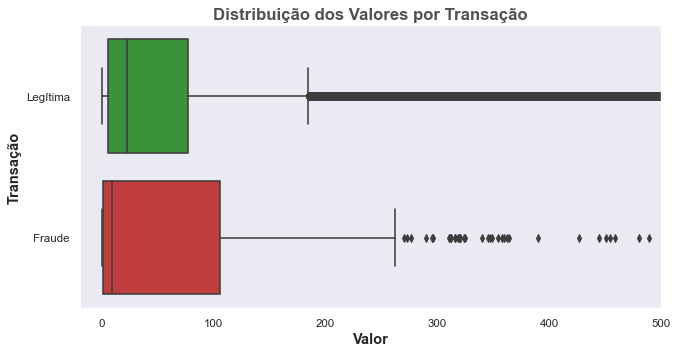

In [ ]:
# Grafico Distribuição dos Valores por Transações
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=75)
sns.boxplot(data=df_ccard, x='Amount', y='Class', orient='h', ax = ax, palette=sns.color_palette("tab10",n_colors=4)[2:])
ax.set_xlim(-20,500)
ax.set_ylabel('Transação', fontsize=14, fontweight='bold')
ax.set_xlabel('Valor', fontsize=14,fontweight='bold')
ax.set_yticklabels(['Legítima','Fraude'])
ax.set_title('Distribuição dos Valores por Transação', color=title_color, fontdict=title_font)

In [ ]:
# Resumo estatistico dos valores das transações (Amount) legitimas.
df_ccard['Amount'].loc[df_ccard['Class'] == 0].describe().to_frame(name='Transações Legítimas')

,Transações Legítimas
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
# Resumo estatistico dos valores das transações (Amount) com fraude.
df_ccard['Amount'].loc[df_ccard['Class'] == 1].describe().to_frame(name='Transações com Fraude')

,Transações com Fraude
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


Text(0.075, 0.5, 'Frequência %')

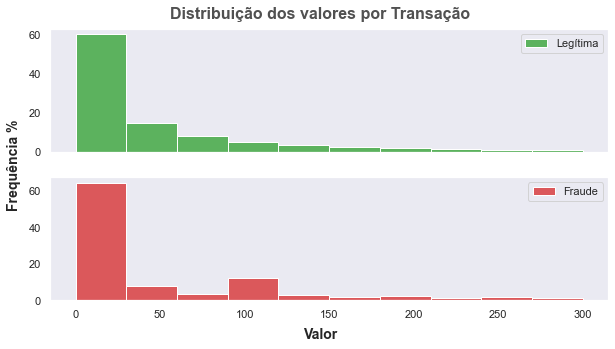

In [ ]:
# Distribuição dos valores por Transação
n_bins = np.histogram_bin_edges(df_ccard['Amount'].loc[(df_ccard['Class'] == 0) & (df_ccard['Amount'] <= 300)], bins=10, range=(0,300))
normal = df_ccard['Amount'].loc[(df_ccard['Class'] == 0) & (df_ccard['Amount'] <= 300)]
fraude = df_ccard['Amount'].loc[(df_ccard['Class'] == 1) & (df_ccard['Amount'] <= 300)]
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharex=True)

sns.histplot(data=normal, ax=ax[0], color=cor_normal, stat='percent', bins=n_bins, label='Legítima')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend()

sns.histplot(data=fraude, color=cor_fraude, ax=ax[1],  stat='percent', bins=n_bins, label='Fraude')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].legend()

fig.suptitle('Distribuição dos valores por Transação', y=0.94, ha='center', color=title_color,fontsize=16, fontweight='bold')
fig.supxlabel('Valor', y=0.01, ha='center', fontsize=14, fontweight='bold')
fig.supylabel('Frequência %', x=0.075, ha='center', fontsize=14, fontweight='bold')

Text(0.075, 0.5, 'Frequência %')

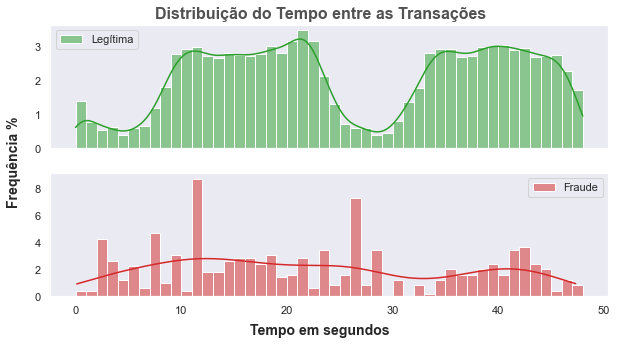

In [ ]:
# Distribuição do Tempo entre as Transações ocorridas em 48 horas
n_bins = np.histogram_bin_edges(df_ccard['Time'].div(3600).loc[df_ccard['Class'] == 0], bins=48)
normal = df_ccard['Time'].div(3600).loc[df_ccard['Class'] == 0]
fraude = df_ccard['Time'].div(3600).loc[df_ccard['Class'] == 1]
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharex=True)

sns.histplot(data=normal, ax=ax[0], color=cor_normal, stat='percent', label='Legítima', bins=n_bins, kde=True)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend()

sns.histplot(data=fraude, ax=ax[1], color=cor_fraude, stat='percent', label='Fraude', bins=n_bins, kde=True)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].legend()

fig.suptitle('Distribuição do Tempo entre as Transações',  y=0.93, ha='center', color=title_color, fontsize=16, fontweight='bold')
fig.supxlabel('Tempo em segundos', y=0.01, ha='center', fontsize=14, fontweight='bold')
fig.supylabel('Frequência %', x=0.075, ha='center', fontsize=14, fontweight='bold')


**Gráfico de Densidade das variáveis PCA**

***O que é um gráfico de densidade?***

>O gráfico de densidade possui a mesma função do histograma, mas representa a distribuição como uma curva contínua. A altura da curva no eixo vertical é uma estimativa da probabilidade de um elemento possuir aquele valor. Por gerar visualizações mais suaves que histogramas, podem facilitar a compreensão da distribuição.

No nosso estudo, irá nos auxiliar na comparação das distribuições dessas variáveis quanto a ocorrencia de transações legítimas e fraudes. Quanto mais as distribuições se diferem uma da outra, nos permite uma melhor detecção de fraude, como por exemplo as variáveis V4 e V11.
Em contrapartida, distribuições muito semelhantes ou sobrepostas, como as variáveis V8 e V15, dificultam essa identificação pelo comportamento muito semelhante.

Text(0.5, 0.9, 'Gráfico de Densidade - Distribuição das variáveis PCA')

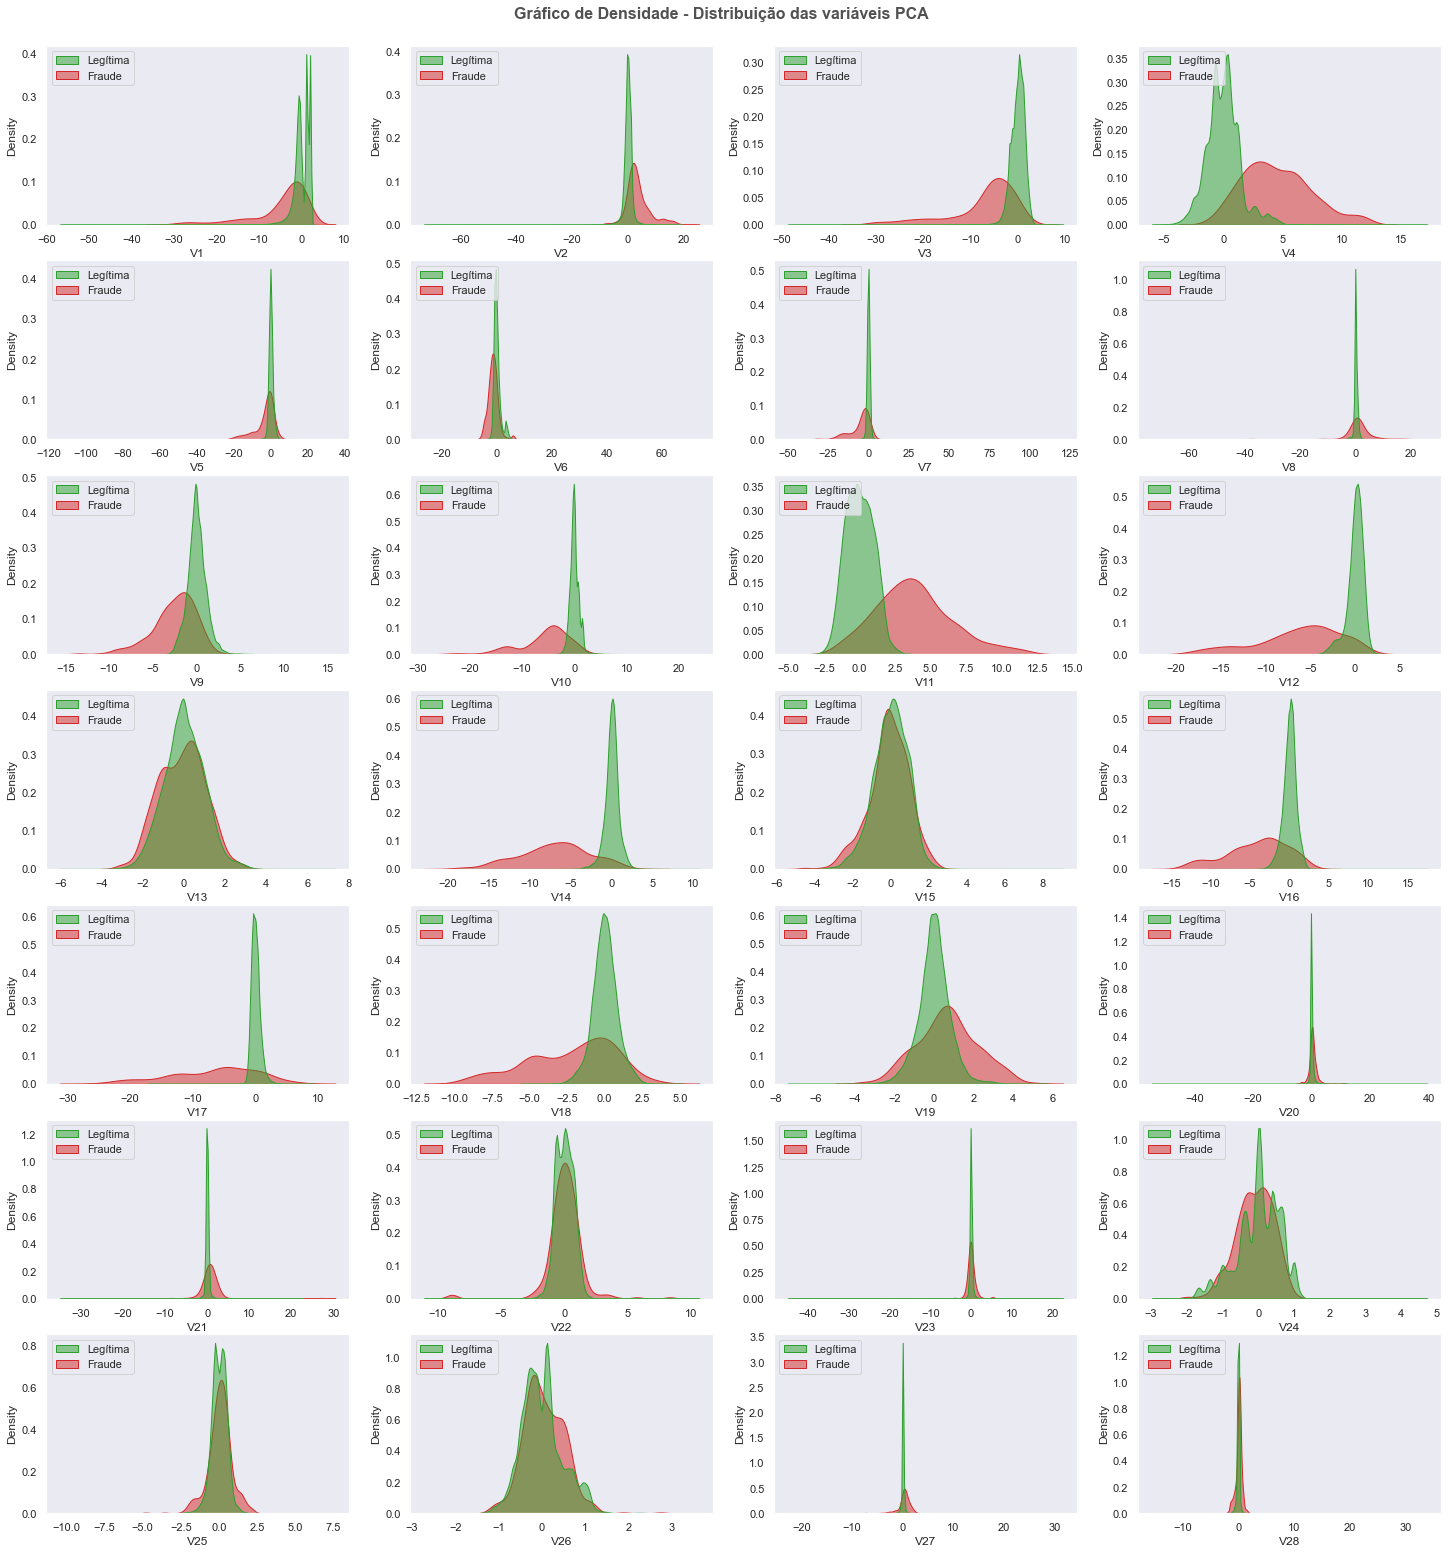

In [ ]:
# Plotar grafico de densidade.
cols = df_ccard.drop(columns=['Amount','Time','Class'], axis=1).columns

fig, axs = plt.subplots(7, 4 , figsize=(25,27))

for ax, i in zip(axs.flat, range(28)):
    sns.kdeplot(data=df_ccard, x=cols[i], hue='Class', common_norm=False,  alpha=.5, fill=True, palette=sns.color_palette("tab10",n_colors=4)[2:], ax = ax)
    legend = ax.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax.legend(handles, ['Legítima','Fraude'], loc='upper left')

plt.suptitle('Gráfico de Densidade - Distribuição das variáveis PCA', y=0.9, ha='center', va='top', color=title_color,fontsize=16, fontweight='bold')


**Resumo da Etapa de Análise Exploratória**

* Nosso dataframe possui agora 284807 linhas e 31 colunas.
* Os tipos de dados para as features estão corretas.
* O dataset não possui valores nulos.
* Nossa variável alvo (Class) temos o valor 0 que representa transações legítimas e o valor 1, que representa transações com fraude.
* As features Time e Amount precisam ser normalizadas.
* O dataset apresenta os dados muito desbalanceados. Transações normais representam 99,83% dos registros, enquanto com fraude apenas 0,17%.
* Pelo resumo estatístico verificamos que a maioria das transações, em torno de 75%, são de valores baixos, com valor perto de 77,00 € para transações normais e 105,00 € para transações com fraude.
* A distribuição dos valores mostra que nas transações normais, a maior frequência de lançamentos ocorre na faixa até 25 €, um pouco mais de 50%.
  Conforme o valor da transação aumenta, nota-se uma grande queda no número de lançamentos.
  Para as transações com fraude, o cenário é semelhante. Até 25 €, quase 60% do total de lançamentos, porém existe uma quantidade maior de lançamentos em faixas de valores superiores.
* A distribuição de tempo entre as transações ocorridas no periodo de 48 horas, nos mostra que as transações normais apresentam dados mais homogeneos e tiveram dois longos períodos com seus maiores volumes de ocorrências.
  O primeiro teve início aproximadamente na 10ª hora após a primeira ocorrência, estendendo-se até aproximadamente 23ª hora.
  O segundo período inicia-se na 34ª hora depois da primeira ocorrência até o final do período de 48 horas.
  Ambos os períodos tiveram a frequência de lançamentos girando em torno de 3% a 3,5% do total.
  Para as transações com fraude, a situação foi diferente. Os dados não apresentam um padrão. Ocorreram vários picos de transações, todos numa faixa de tempo muito mais curta.
  Podemos destacar dois, o primeiro ocorreu na 12ª hora após a primeira transação e o segundo ocorreu depois da 27ª hora. Os percentuais foram em torno de 8,5% e 7%, respectivamente.
  Nos demais períodos, os lançamentos se mantiveram numa faixa de percentual semelhante, com uma frequência de até 4,5% do total.


### **Divisão do conjunto de dados - Treinamento e Teste**

Antes da etapa de Pré-processamento, iremos realizar a divisão do conjunto de dados em dois outros conjuntos.

O primeiro denominado Treinamento (train), como o nome já diz, será utilizado para realizarmos o treinamento e ajustes de nosso modelo de aprendizado.

O segundo conjunto de dados, denominado Teste (test), servirá para avaliação do desempenho de nosso modelo treinado.

Por que essa divisão é necessária?

> Se fizessemos o treinamento de nosso modelo utilizando a totalidade dos dados, no momento dele trabalhar com novos dados, ou seja, dados desconhecidos, ele faria a previsão, porém não conseguiriamos medir seu desempenho.
Outro problema gerado seria o Overfitting.

> Overfitting é quando o modelo se adaptou muito bem aos dados que foi treinado, mas não generaliza bem para novos dados, seria como se ele tivesse decorado mas não aprendido de fato.



**Separando o conjunto de Teste**



A proporção da divisão ficará com 70% dos dados para Treinamento e 30% dos dados para Teste.





In [ ]:
# criando o conjunto de teste
df_ccard_test = df_ccard.sample(frac=0.30, random_state=0)

# verificando o conjunto
print(df_ccard_test.shape)
df_ccard_test.head()

(85442, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0


In [ ]:
# drop das linhas de teste
df_ccard_train = df_ccard.drop(df_ccard_test.index)

# verificando o shape do df
print(df_ccard_train.shape)
df_ccard_train.head()

(199365, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


Com a divisão realizada, nossos novos conjuntos de dados ficaram com as seguintes estruturas:

* Conjunto de dados Treinamento (df_ccard_train): 199365 linhas e 31 colunas.
* Conjunto de dados Teste (df_ccard_test): 85442 linhas e 31 colunas.

In [ ]:
# Salvando o dataframe após divisao do conjunto de dados
df_ccard_test.to_csv('df_ccard_test.csv', index=False)

# Salvando o dataframe após divisao do conjunto de dados
df_ccard_train.to_csv('df_ccard_train.csv', index=False)

### **Pré-Processamento de Dados**

<center><img width="60%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/Data.PreProcessing_1.jpg"></center>

Sendo uma etapa necessária no aprendizado de máquina, é o processo de converter ou mapear dados de uma forma “bruta” para outro formato, para torná-lo pronto para análise posterior. É um processo que compreende a preparação, organização e estruturação de dados.

Outra questão é que a qualidade dos dados e as informações úteis que podem ser derivadas deles afetam diretamente a capacidade de aprendizado de nosso modelo.

Objetivos:

* Tratamento dos valores ausentes
* Tratamento de outliers
* Normalização de dados
* Balanceamento de Dados

In [ ]:
df_ccard_train = pd.read_csv('df_ccard_train.csv')

In [ ]:
df_ccard_test = pd.read_csv('df_ccard_test.csv')

In [ ]:
df_ccard_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
3,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
4,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199360,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
199361,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
199362,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
199363,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0


**Tratamento de dados ausentes**

Como foi visto na etapa de análise exploratória, nosso dataset não apresenta variáveis com valores nulos.

**Normalização das features Time e Amount**

>A normalização ou padronização, é uma técnica geralmente aplicada como parte da preparação de dados para o aprendizado de máquina. O objetivo da normalização é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações.

Utilizaremos o método ***StandardScaler***  para redimensionar a distribuição de valores para que a média dos valores observados seja 0 e o desvio padrão seja 1.

Saiba mais em: [***StandardScaler***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Nesta etapa faremos apenas uma verificação de como as Features ficarão após sua normalização, pois como estratégia, faremos a normalização durante o processo de treinamento do modelo, utilizando o recurso de **Pipeline**.

In [ ]:
X_ccard_train = df_ccard_train.drop(columns='Class', axis=1)

In [ ]:
X_ccard_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
1,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
2,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
3,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
4,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199360,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99
199361,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68
199362,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69
199363,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79


In [ ]:
pd.DataFrame(X_ccard_train, columns=['Time','Amount'])

,Time,Amount
0,0.0,2.69
1,1.0,123.50
2,2.0,69.99
3,4.0,4.99
4,7.0,40.80
...,...,...
199360,172783.0,79.99
199361,172784.0,2.68
199362,172785.0,2.69
199363,172787.0,24.79


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), ['Time', 'Amount'])],
    remainder='drop')

In [ ]:
preprocessor

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['Time', 'Amount'])])

In [ ]:
X_ccard_ppro = preprocessor.fit_transform(X_ccard_train)

In [ ]:
X_ccard_ppro

array([[-1.9957947 , -0.34935351],
       [-1.99577365,  0.14153713],
       [-1.99575259, -0.07589154],
       ...,
       [ 1.64180241, -0.34935351],
       [ 1.64184452, -0.25955396],
       [ 1.64194978,  0.52145828]])

In [ ]:
X_ccard_ppro.shape

(199365, 2)

In [ ]:
pd.DataFrame(X_ccard_ppro, columns=['Time_Std','Amount_Std'])

,Time_Std,Amount_Std
0,-1.995795,-0.349354
1,-1.995774,0.141537
2,-1.995753,-0.075892
3,-1.995710,-0.340008
4,-1.995647,-0.194500
...,...,...
199360,1.641760,-0.035258
199361,1.641781,-0.349394
199362,1.641802,-0.349354
199363,1.641845,-0.259554


In [ ]:
pd.DataFrame(X_ccard_ppro, columns=['Time_Std','Amount_Std']).describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Time_Std,Amount_Std
count,199365.000,199365.000
mean,0.000,-0.000
std,1.000,1.000
min,-1.996,-0.360
25%,-0.856,-0.337
50%,-0.214,-0.271
75%,0.938,-0.045
max,1.642,79.511


Como podemos verificar pela tabela acima, obtivemos os valores esperados para a média (0) e desvio padrão (1), utilizando a Normalização **StandardScaler**.

**Balanceamento de Dados**

Nosso dataset apresenta um grande desbalanceamento de dados, onde o número de registros de transações legítimas, supera em muito o número de transações com fraude, numa proporção aproximada que, a cada 577 transações legítimas, ocorre uma transação com fraude.

Por que isso seria problemático? Com poucos casos de fraude em relação aos legítimas, o modelo de treinamento passará a maior parte do tempo em exemplos legítimas e não aprenderá o suficiente com exemplos de fraude.





Para solucionar esse problema utilizaremos o método de ***Undersampling***.

>***Undersampling***. É uma técnica que consiste em manter todos os dados da classe com menor frequência, que no nosso caso são transações com fraude, e diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as observações no conjunto possuam dados com a variável alvo equilibrada.

Saiba mais em: [***RandomUnderSampler***](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

Realizaremos este processo somente no conjunto de dados de Treinamento.

In [ ]:
df_ccard_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
3,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
4,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


In [ ]:
rus = RandomUnderSampler(random_state=0)

X_train = df_ccard_train.drop(columns=['Class'], axis=1)
y_train = df_ccard_train['Class']


X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
df_ccard_rus = X_rus.copy()

In [ ]:
X_rus.shape

(690, 30)

In [ ]:
df_ccard_rus['Class'] = y_train

In [ ]:
df_ccard_rus['Class'].value_counts()

0    345
1    345
Name: Class, dtype: int64

Text(0.18, 550, 'Total de Transações: 690')

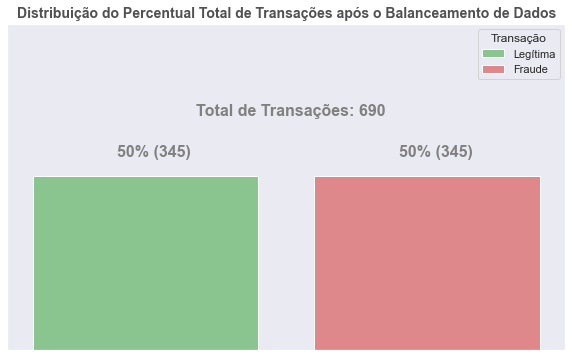

In [ ]:
# Grafico Distribuição do Percentual Total de Transações após o Balanceamento de Dados
n_bins = np.histogram_bin_edges(df_ccard_rus['Class'], bins=1)
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.histplot(data=df_ccard_rus, x='Class', stat='count', discrete=(True,True), bins=n_bins, log_scale=(False,True), hue='Class', hue_order=[0,1], palette=sns.color_palette("tab10",n_colors=4)[2:], shrink=.8)

ax.set_title('Distribuição do Percentual Total de Transações após o Balanceamento de Dados', color=title_color, fontweight='bold', fontsize=14)
ax.set_xticklabels(labels='')
ax.set_yticklabels(labels='')
ax.set_xlabel('')
ax.set_ylabel('')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Legítima','Fraude'], title='Transação')

# Coloca os valores dos percentuais nas barras correspondentes
ax.annotate('50% (345)', xy=(-0.1, 400), color='gray', fontsize=16, fontweight='bold')
ax.annotate('50% (345)', xy=(0.90, 400), color='gray', fontsize=16, fontweight='bold')
ax.annotate('Total de Transações: 690', xy=(0.18, 550), color='gray', fontsize=16, fontweight='bold')

Após o processo temos o resultado esperado. Nosso dataset ficou com a mesma quantidade de ocorrências para as transações Legítimas e com Fraude.

### **Feature Selection**

<center><img width="60%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/Feature.Selection.jpg"></center>

É o processo de redução do número de variáveis ​​de entrada ao desenvolver um modelo preditivo. É desejável reduzir o número de variáveis ​​de entrada tanto para reduzir o custo computacional da modelagem quanto, em alguns casos, para melhorar o desempenho do modelo.

<center><img width="50%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/Feature.Selection_1.png"></center>

Saiba mais em: [***FeatureSelection***](https://scikit-learn.org/stable/modules/feature_selection.html)

Nessa etapa de seleção de features, usaremos duas abordagens:

* **Correlação entre variáveis**
* Função **SelectKBest**  do módulo  **feature_selection** da bilioteca **scikit-learn**.


O que é correlação?
> Em termos gerais, a correlação é uma medida do grau em que duas variáveis ​​mudam simultaneamente. O coeficiente de correlação descreve a força e a direção do relacionamento.
> A correlação é um conceito importante que está no centro da modelagem de dados. Semelhante à linearidade, a correlação é um conceito comum usado nas conversas do dia a dia. Quando dizemos que duas coisas estão correlacionadas, geralmente queremos dizer que conforme uma muda, a outra também muda.

Uma maneira de medir a força da correlação entre variáveis ​​numéricas contínuas é usando um método chamado Correlação de Pearson.

O método de correlação de Pearson fornecerá dois valores, o `coeficiente de correlação` e o `valor p`.

**Correlação de Pearson**

A Correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y e é obtida através do método `dataframe.corr(numeric_only=True)`

O coeficiente resultante é um valor entre -1 e 1 inclusive, onde:

* 1: Correlação linear positiva perfeita.
* 0: Sem correlação linear, as duas variáveis ​​provavelmente não afetam uma à outra.
* -1: Correlação linear negativa perfeita.

***Qual é esse P-value?***

O P-value é o valor da probabilidade de que a correlação entre essas duas variáveis ​​seja estatisticamente significativa. Normalmente, escolhemos um nível de significância de 0,05, o que significa que temos 95% de confiança de que a correlação entre as variáveis ​​é significativa.

Por convenção, quando o

* P-value é $<$ 0,001:  dizemos que há forte evidência de que a correlação é significativa.
* P-value entre 0,001 e 0,05:  há evidência moderada de que a correlação é significativa.
* P-value entre 0,05 e 0,1: há evidências fracas de que a correlação é significativa.
* P-value é $>$ 0,1: não há evidência de que a correlação seja significativa.




    
O método **SelectKBest** seleciona as características de acordo com a k pontuação mais alta. Ao alterar o parâmetro 'score_func', podemos aplicar o método para dados de classificação e regressão. Selecionar os melhores recursos é um processo importante quando preparamos um grande conjunto de dados para treinamento




**Utilizando o coeficiente de Pearson e P-value**

In [ ]:
df_ccard_rus.corr()['Class'].to_frame()

,Class
Time,-0.161050
V1,-0.442478
V2,0.497344
V3,-0.568299
V4,0.717853
V5,-0.381020
V6,-0.377574
V7,-0.469883
V8,0.050037
V9,-0.529021


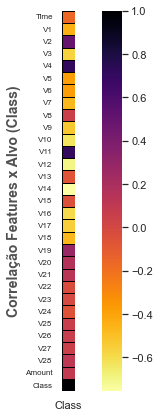

In [ ]:
# Correlação entre Class e as features independentes
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_ccard_rus.corr()['Class'].to_frame(), cmap='inferno_r', fmt='.1f', square=True, linecolor='black', linewidths=.5, ax=ax);
ax.set_ylabel('Correlação Features x Alvo (Class)', fontsize=14, fontweight='bold', color=title_color)
ax.tick_params(axis='y', labelsize=8)

In [ ]:
df_ccard_rus.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.262834,-0.221295,0.138551,-0.217714,0.288297,0.114685,0.222906,-0.137659,0.156564,...,-0.058082,0.105301,0.093944,-0.037037,-0.224909,-0.039588,-0.137298,-0.058379,-0.002285,-0.161050
V1,0.262834,1.000000,-0.839463,0.894093,-0.614573,0.882507,0.301396,0.900172,-0.059254,0.680486,...,-0.015749,0.002295,-0.027758,-0.111372,-0.099459,0.089461,0.256799,0.158821,-0.033606,-0.442478
V2,-0.221295,-0.839463,1.000000,-0.873953,0.703364,-0.809733,-0.246962,-0.867873,-0.066237,-0.707524,...,0.072447,-0.043011,0.159120,0.068054,0.130760,-0.040617,-0.222863,0.048123,-0.216050,0.497344
V3,0.138551,0.894093,-0.873953,1.000000,-0.765361,0.869295,0.453024,0.890580,-0.149294,0.767071,...,0.012650,-0.035838,-0.012676,-0.052427,-0.127501,0.034636,0.188612,0.097524,-0.023450,-0.568299
V4,-0.217714,-0.614573,0.703364,-0.765361,1.000000,-0.584947,-0.424706,-0.695871,0.090491,-0.769902,...,-0.018030,0.096294,-0.003478,-0.010345,0.035323,0.092827,-0.110973,-0.040316,0.016179,0.717853
V5,0.288297,0.882507,-0.809733,0.869295,-0.584947,1.000000,0.289092,0.852169,-0.191839,0.677331,...,0.038921,-0.083227,-0.084117,-0.198329,-0.127799,0.094433,0.244534,0.143801,-0.107121,-0.381020
V6,0.114685,0.301396,-0.246962,0.453024,-0.424706,0.289092,1.000000,0.225471,-0.641058,0.342243,...,0.082897,-0.026417,0.389771,-0.110703,-0.203689,-0.025200,-0.146170,-0.017321,0.127753,-0.377574
V7,0.222906,0.900172,-0.867873,0.890580,-0.695871,0.852169,0.225471,1.000000,0.132832,0.764820,...,0.013107,-0.076321,-0.068409,-0.091672,0.026481,0.069436,0.309334,0.137219,0.089526,-0.469883
V8,-0.137659,-0.059254,-0.066237,-0.149294,0.090491,-0.191839,-0.641058,0.132832,1.000000,-0.061063,...,-0.195619,0.110808,-0.450052,0.097567,0.258940,0.048659,0.274343,-0.046321,0.041047,0.050037
V9,0.156564,0.680486,-0.707524,0.767071,-0.769902,0.677331,0.342243,0.764820,-0.061063,1.000000,...,0.185988,-0.247433,-0.038437,-0.056517,-0.020977,-0.077995,0.231891,0.161782,0.009790,-0.529021


**Colinearidade**

O que é ***Colinearidade*** estatística?
Expressão da relação entre duas (colinearidade) ou mais (multicolinearidade) variáveis independentes. Diz-se que duas variáveis independentes exibem colinearidade completa se seu coeficiente de correlação é 1, e completa falta de colinearidade se o coeficiente de correlação é 0.

Iremos verificar a existência de colinearidade entre as features independentes, verificando seu resultado do coeficiente de Pearson e p-value. Utilizaremos o **threshold** (limite) de 0.8 para o coeficiente e p-value <= 0.05 para excluirmos as variáveis.

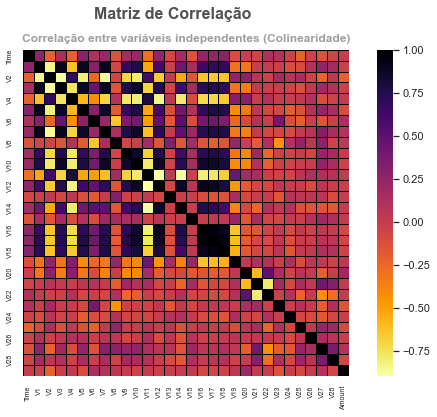

In [ ]:
# Correlação entre variáveis independentes (Colinearidade)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(X_rus.corr(), cmap='inferno_r', fmt='.1f', square=True, linecolor='black', linewidths=.5, ax=ax);
fig.suptitle('Matriz de Correlação', fontsize=16, fontweight='bold', color=title_color)
ax.set_title('Correlação entre variáveis independentes (Colinearidade)', fontsize=12, fontweight='bold', color=subtitle_color, va='bottom')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)

In [ ]:
def colinearidade(dataset, threshold):
    col_corr = set()  # Set das colunas correlacionadas
    corr_matrix = dataset.corr()
    col_colinearidade = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                pearson_coef, p_value = stats.pearsonr(dataset[corr_matrix.index[i]], dataset[corr_matrix.columns[j]])
                col_colinearidade.append({'Feature_1': corr_matrix.index[i],
                                        'Feature_2': corr_matrix.columns[j],
                                        'Coef. Pearson': pearson_coef,
                                        'P-value': p_value,
                                        'Colinearidade' : True if np.absolute(p_value) <= 0.05 else False})
    return pd.DataFrame(col_colinearidade), col_corr

In [ ]:
# Features detectadas com colinearidade
col_colinearidade, corr_features = colinearidade(X_rus, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  10


In [ ]:
col_colinearidade

,Feature_1,Feature_2,Coef. Pearson,P-value,Colinearidade
0,V2,V1,-0.839463,2.141448e-184,True
1,V3,V1,0.894093,3.402709e-242,True
2,V3,V2,-0.873953,8.975087e-218,True
3,V5,V1,0.882507,1.352389e-227,True
4,V5,V2,-0.809733,1.970937e-161,True
5,V5,V3,0.869295,1.013263e-212,True
6,V7,V1,0.900172,1.497818e-250,True
7,V7,V2,-0.867873,3.230569e-211,True
8,V7,V3,0.890580,1.352783e-237,True
9,V7,V5,0.852169,1.080423e-195,True


In [ ]:
corr_features

{'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7'}

No final da verificação de Colinearidade, obtivemos essas Features que serão excluidas de nosso modelo:

* 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7'


**Utilizando a função SelectKBest**

Saiba mais em: [***SelectKBest***](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), ['Time', 'Amount'])],
    remainder='passthrough')

In [ ]:
# Configurado para selecionar as 10 melhores features k=10
fs = SelectKBest(score_func=f_classif, k=10)

In [ ]:
# aprende o relacionamento a partir de dados de treinamento
fs.fit(X_rus, y_rus)
# transformar dados de entrada
X_rus_fs = fs.transform(X_rus)

In [ ]:
# Features obtidas pelo processo SelectKBest.
fs.get_feature_names_out(input_features=None)

array(['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'],
      dtype=object)

In [ ]:
# Criando um objeto Pipeline com Normalização de dados e Feature Selection
pipe = Pipeline([('preprocessor',preprocessor), ('feature_select', SelectKBest(score_func=f_classif, k=10))])

In [ ]:
pipe.fit(X_rus, y_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Time', 'Amount'])])),
                ('feature_select', SelectKBest())])

In [ ]:
X_rus_sk = pipe.transform(X_rus)

In [ ]:
pipe.get_feature_names_out(input_features=None)

array(['remainder__V2', 'remainder__V3', 'remainder__V4', 'remainder__V9',
       'remainder__V10', 'remainder__V11', 'remainder__V12',
       'remainder__V14', 'remainder__V16', 'remainder__V17'], dtype=object)

Essas foram as 10 Features melhores ranqueadas pelo processo do SelectKBest:

['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


### **Modelos de Machine Learning**

<center><img width="50%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/ml.jpg"></center>

Imagem de <a href="https://br.freepik.com/vetores-gratis/ilustracao-de-automacao-de-processos-roboticos_21743710.htm#query=machine%20learning&position=37&from_view=search&track=ais">Freepik</a>

Utilizaremos vários algoritmos de Machine Learning, juntamente com conceito de **Pipeline** para organizar todas a etapas de produção dos nossos modelos de aprendizado.

> Pipeline. É uma maneira de codificar e automatizar o fluxo de trabalho necessário para produzir um modelo de aprendizado de máquina. Os pipelines consistem em várias etapas sequenciais que fazem tudo, desde a extração e pré-processamento de dados até o treinamento e a implantação do modelo.

Saiba mais em: [***Pipeline***](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)

**Regressão Logística**

Esse tipo de modelo estatístico é frequentemente usado para classificação e análise preditiva. A regressão logística estima a probabilidade de ocorrência de um evento, como um voto, com base em um determinado conjunto de dados de variáveis independentes. Como o resultado é uma probabilidade, a variável dependente é limitada entre 0 e 1.

Saiba mais em: [***LogisticRegression***](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**LinearSVC**

Implementa um algoritmo de classificação, o SVM (máquina de vetores de suporte). O que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de **hiperplano** entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes.

>***SVM - Máquina de vetores de suporte***. É um conceito na ciência da computação para um conjunto de métodos de aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de regressão. O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico.

Saiba mais em: [***LinearSVC***](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

**KNeighborsClassifier**

Também conhecido como KNN ou k-NN, é um classificador de aprendizado supervisionado não paramétrico, que usa a proximidade para fazer classificações ou previsões sobre o agrupamento de um ponto de dados individual.

Saiba mais em: [***KNeighborsClassifier***](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)


**Modelo Baseline**

Um modelo Baseline é essencialmente um modelo simples que atua como referência em um projeto de aprendizado de máquina. Sua principal função é contextualizar os resultados dos modelos treinados. Os modelos Baseline geralmente carecem de complexidade e podem ter pouco poder preditivo.

O desempenho desse modelo servirá como ponto de partida de comparação da avaliação da eficácia dos outros modelos mais complexos. Nosso modelo Baseline será composto por dados do Conjunto de Treinamento sem passar pelas etapas de Balanceamento, Normalização e Feature Selection.

**Avaliação de desempenho**

Para a avaliação dos modelos usaremos a validação cruzada (K-fold cross-validation) de 10 folders.

> Validação cruzada K-fold. Consiste em dividir aleatoriamente o conjunto de observações em k grupos, ou dobras, de tamanho aproximadamente igual. A primeira dobra é tratada como um conjunto de teste e o modelo é ajustado nas k − 1 dobras restantes. O erro é então calculado nas observações na dobra mantida. Este procedimento é repetido k vezes; a cada vez, um grupo diferente de observações é tratado como um conjunto de teste. Este processo resulta em k estimativas do erro de teste. A estimativa de CV k-fold é calculada com a média desses valores de erro.

Saiba mais em: [***CrossValidation***](https://scikit-learn.org/stable/modules/cross_validation.html)

Nesta fase, somente utilizaremos a métrica **Recall** para avaliação do desempenho.


In [ ]:
fs_colunas_colinearidade = ['V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7'] # Features com colinearidade que serão deletadas do nosso modelo
fs_colunas_selectkbest = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10','V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21','V28'] # Features selecionadas pelo SelectKBest

In [ ]:
# Criando o dataframe sem as features detectadas com colinearidade.
X_rus_pearson = X_rus.drop(columns=['V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7'], axis=1)

In [ ]:
# Configuração para o kfold Cross-Validation com 10 folders
kfold = KFold(n_splits=10, shuffle=True, random_state=32)

In [ ]:
# Processo de Normalização das Features Time e Amount para ser utlizado no Pipeline.
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), ['Time', 'Amount'])],
    remainder='passthrough')

In [ ]:
def model_recall_score(model, X, y, kfold):
    return np.mean(cross_val_score(model, X, y, cv=kfold, scoring='recall'))

In [ ]:
# Modelo Baseline - Pipeline com Regressão Logistica para o conjunto de Dados sem Feature Selection, Normalização e Balanceamento.
pipe_baseline = Pipeline([('model', LogisticRegression())])

In [ ]:
# Calcula o score Recall obtido pelo modelo Baseline.
print(f"Baseline Recall: {model_recall_score(pipe_baseline, X_train, y_train, kfold):.2f}")

Baseline Recall: 0.66


Para o nosso modelo **Baseline**, que foi criado utilizando o Pipeline com Regressão Logistica para o conjunto de Dados sem Feature Selection, Normalização e Balanceamento, conseguimos um **Recall** de 0.66.

Esse valor servirá como parametro de comparação de desempenho entre outros modelos mais complexos que iremos testar.

**Construindo os Pipelines dos modelos**

In [ ]:
# Pipeline com Normalização, Balanceamento RandomUnderSampler e Regressão Logistica para o conjunto de Dados sem Feature Selection.
pipe_log = Pipeline([('preprocessor', preprocessor), ('model', LogisticRegression())])

In [ ]:
# Pipeline com Normalização, Balanceamento RandomUnderSampler e LinearSVC para o conjunto de Dados sem Feature Selection.
pipe_svc = Pipeline([('preprocessor', preprocessor),('model', LinearSVC())])

In [ ]:
# Pipeline com Normalização, Balanceamento RandomUnderSampler e KNeighborsClassifier para o conjunto de Dados sem Feature Selection.
pipe_knn = Pipeline([('preprocessor', preprocessor),('model', KNeighborsClassifier())])

In [ ]:
# Realizando o primeiro teste de desempenho
pipelines = [pipe_log, pipe_svc, pipe_knn]

ranking_recall = []

for pipe in pipelines:
    recall = model_recall_score(pipe, X_rus, y_rus, kfold)
    ranking_recall.append({'Modelo': pipe.named_steps.model,
                         'Recall' : recall })

pd.DataFrame(ranking_recall)

,Modelo,Recall
0,LogisticRegression(),0.922358
1,LinearSVC(),0.916108
2,KNeighborsClassifier(),0.890193


Para nossa avaliação de desempenho dos modelos, foram criados três Pipelines:
* pipe_log - Regressão Logística
* pipe_svc - LinearSVC
* pipe_knn - KNeighborsClassifier

Todos os Pipelines utilizam o conjunto de Dados de Treinamento sem Feature Selection e comtemplam as seguintes fases:
* Normalização StandardScaler
* Balanceamento RandomUnderSampler
* Algoritmo de Machine Learning

Conforme os resultados acima, verificamos que o modelo que apresentou melhor desempenho, ou seja, um maior valor de **Recall (0.922358)** , foi o algoritmo de **Regressão Logística**, implementado pelo Pipeline **pipe_log**.





Definido nosso melhor algoritmo, o que faremos a seguir é tentar melhorar sua eficácia, otimizando seus hiperparâmetros e utilizando Feature Selection, onde selecionaremos as melhores Features, seja eliminando a colinearidade entre elas, com o coeficiente de Pearson ou selecionando as que possuam maior relevância, com a função SelectKBest.

>No aprendizado de máquina, um **hiperparâmetro** é um parâmetro ajustável, cujo valor é usado para controlar o processo de aprendizado e através disso obter um modelo com desempenho ideal.

Para otimização desses hiperparâmetros, utilizaremos o recurso **GridSearchCV**.


>***GridSearchCV*** é uma técnica para encontrar os valores de parâmetros ideais de um determinado conjunto de parâmetros, fazendo os ajustes necessários, utilizando uma técnica de validação cruzada. Depois de extrair os melhores valores de parâmetros, as previsões são feitas.


Saiba mais em: [***GridSearchCV***](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


Para nosso modelo de Regressão Logística faremos a otimização dos seguintes hiperparâmetros:

* penalty
* dual
* tol
* C
* solver
* max_iter

In [ ]:
# Chaves disponiveis no modelo para configurar os hiperparametros
pipe_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__scaler', 'preprocessor__scaler__copy', 'preprocessor__scaler__with_mean', 'preprocessor__scaler__with_std', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [ ]:
# Hiperparametros para ajuste do modelo LR
param_log = {'model__penalty': ['l1', 'l2', 'elasticnet', None],
            'model__dual': [True, False],
            'model__tol': [1e-4, 1e-05],
            'model__C': [10**-2,10**-1,10**0,10**1,10**2],
            'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'model__max_iter': range(10, 110, 10)}

In [ ]:
# Executa GridSearchCV para o melhor ajuste do modelo LR
model_log = GridSearchCV(estimator=pipe_log, param_grid=param_log, cv=kfold, scoring='recall')
model_log.fit(X_rus, y_rus)

GridSearchCV(cv=KFold(n_splits=10, random_state=32, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__dual': [True, False],
                         'model__max_iter': range(10, 110, 10),
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                       

In [ ]:
model_log.best_params_

{'model__C': 10,
 'model__dual': False,
 'model__max_iter': 10,
 'model__penalty': 'l2',
 'model__solver': 'saga',
 'model__tol': 1e-05}

In [ ]:
model_log.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Time', 'Amount'])])),
                ('model',
                 LogisticRegression(C=10, max_iter=10, solver='saga',
                                    tol=1e-05))])

In [ ]:
# Calcula o score Recall obtido pelo model_log
print(f"Recall model_log: {model_log.best_score_:.4f}")

Recall model_log: 0.9455


In [ ]:
# Executa GridSearchCV para o melhor ajuste do modelo LR com Feature Selection utilizando correlação de Pearson.
model_log_pearson = GridSearchCV(estimator=pipe_log, param_grid=param_log, cv=kfold, scoring='recall')
model_log_pearson.fit(X_rus_pearson, y_rus)

GridSearchCV(cv=KFold(n_splits=10, random_state=32, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__dual': [True, False],
                         'model__max_iter': range(10, 110, 10),
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                       

In [ ]:
# Melhor estimador encontrado pelo processo do GridSearchCV
model_log_pearson.best_params_

{'model__C': 0.01,
 'model__dual': False,
 'model__max_iter': 10,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'model__tol': 0.0001}

In [ ]:
model_log_pearson.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Time', 'Amount'])])),
                ('model',
                 LogisticRegression(C=0.01, max_iter=10, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
# Calcula o score Recall obtido pelo model_log_pearson
print(f"Recall model_log_pearson: {np.mean(model_log_pearson.best_score_):.4f}")

Recall model_log_pearson: 0.9797


In [ ]:
# Pipeline com Normalização, Balanceamento RandomUnderSampler e Regressão Logistica para o conjunto de Dados com Feature Selection utilizando a função SelectKBest.
pipe_log_skb = Pipeline([('preprocessor', preprocessor), ('feature_select', SelectKBest(score_func=f_classif, k=10)), ('model', LogisticRegression())])

In [ ]:
# Executa GridSearchCV para o melhor ajuste do modelo LR com Feature Selection utilizando a função SelectKBest
model_log_skb = GridSearchCV(estimator=pipe_log_skb, param_grid=param_log, cv=kfold, scoring='recall')
model_log_skb.fit(X_rus, y_rus)

GridSearchCV(cv=KFold(n_splits=10, random_state=32, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('feature_select', SelectKBest()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__dual': [True, False],
                         'model__max_iter': range(10, 110, 10),
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': [

In [ ]:
# Melhor estimador encontrado pelo processo do GridSearchCV
model_log_skb.best_params_

{'model__C': 0.01,
 'model__dual': False,
 'model__max_iter': 10,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'model__tol': 0.0001}

In [ ]:
model_log_skb.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Time', 'Amount'])])),
                ('feature_select', SelectKBest()),
                ('model',
                 LogisticRegression(C=0.01, max_iter=10, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
# Calcula o score Recall obtido pelo model_log_skb
print(f"Recall model_log_skb : {np.mean(model_log_skb.best_score_):.4f}")

Recall model_log_skb : 0.9428


***Como foi a etapa de testes de desempenho com os paramêtros otimizados?***

Para construção das etapas de nossos modelos, usamos a estrutura de Pipeline contendo, o algoritmo de Regressão Logística, Normalização de dados com StandardScaler, conjunto de dados balanceado com RandomUnderSampler, validação cruzada de 10 folders e métrica Recall para avaliação.

Nosso modelo Baseline, diferentemente dos outros, foi criado utilizando o Pipeline com Regressão Logistica para o conjunto de Dados sem Feature Selection, Normalização e Balanceamento. Ele serviu de parametro de inicial para comparação com nossos outros modelos mais complexos.

Nos modelos com Feature Selection, utilizamos o coeficiente de Pearson e P-value para avaliar a existência de Colinearidade e também a função SelectKBest para selecionar as features com maior relevancia.

Utilizando o método GridSearchCV, otimizamos os hiperparâmetros para encontrar a configuração com melhor desempenho para nossos modelos.

Com isso, obtivemos:

* model_log:
    * modelo sem Feature Selection com os hiperparâmetros: {'model__C': 10, 'model__dual': False, 'model__max_iter': 10, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 1e-05}
    * Recall: **0.9455**
* model_log_pearson:
    * modelo utilizando o coeficiente de Pearson com os hiperparâmetros: {'model__C': 0.01, 'model__dual': False, 'model__max_iter': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.0001}
    * Recall: **0.9797**
* model_log_skb:
    * modelo utilizando SelectKBest com os hiperparâmetros: {'model__C': 0.01, 'model__dual': False, 'model__max_iter': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.0001}
    * Recall: **0.9428**
    
Olhando para esses números, concluimos que a otimização rendeu frutos, obtivemos ótimos resultados com nossos modelos.

Dito isso, com nossos modelos configurados, realizaremos a seguir nossa etapa de treinamento.



#### Treinamento dos modelos

Faremos o treinamento dos modelos utilizando o conjunto de dados de Treinamento Balanceado sem Feature Selection (X_rus, y_rus) e com Feature Selection (X_rus_pearson, y_rus), e então, avaliaremos o desempenho através de algumas métricas.

Novamente usaremos a Validação Cruzada (K-fold Cross-Validation) de 10 folders.

**Realizando as previsões e calculando as probabilidades das Classes.**

In [ ]:
model_log.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Time', 'Amount'])])),
                ('model',
                 LogisticRegression(C=10, max_iter=10, solver='saga',
                                    tol=1e-05))])

In [ ]:
# Realizar previsão com o Pipeline model_log - Regressão Logística
y_hat = cross_val_predict(model_log.best_estimator_, X_rus, y_rus, cv=kfold)
# Calcular as probabilidades das classes
y_proba_0, y_proba_1  = cross_val_predict(model_log.best_estimator_, X_rus, y_rus, cv=kfold, method='predict_proba').T

In [ ]:
model_log_pearson.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Time', 'Amount'])])),
                ('model',
                 LogisticRegression(C=0.01, max_iter=10, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
# Realizar previsão com o Pipeline model_log_pearson - Regressão Logística com Feature Selection utilizando correlação de Pearson.
y_hat_pearson = cross_val_predict(model_log_pearson.best_estimator_, X_rus_pearson, y_rus, cv=kfold)
# Calcular as probabilidades das classes
y_proba_pearson_0, y_proba_pearson_1 = cross_val_predict(model_log_pearson.best_estimator_, X_rus_pearson, y_rus, cv=kfold, method='predict_proba').T

In [ ]:
model_log_skb.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Time', 'Amount'])])),
                ('feature_select', SelectKBest()),
                ('model',
                 LogisticRegression(C=0.01, max_iter=10, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
# Realizar previsão com o Pipeline model_log_skb - Regressão Logística com Feature Selection utilizando a função SelectKBest
y_hat_skb = cross_val_predict(model_log_skb.best_estimator_, X_rus, y_rus, cv=kfold)
# Calcular as probabilidades das classes
y_proba_skb_0, y_proba_skb_1  = cross_val_predict(model_log_skb.best_estimator_, X_rus, y_rus, cv=kfold, method='predict_proba').T

**Avaliação das métricas dos modelos**

Para as métricas de avaliação do desempenho desses modelos de classificação selecionados, além do Recall, utilizaremos Precision, F1-score, Acurácia, AUC , Matriz de Confusão e Histograma de Probabilidades.

Saiba mais em: [***Classification-metrics***](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)


* ***Recall***.
Recall é a capacidade do modelo de encontrar todas as instâncias positivas. Para todas as instâncias que são de fato positivas, qual é o percentual de acerto. O melhor valor é 1 e o pior valor é 0.
$$
Recall = \frac{TP}{TP+FN}
$$

* ***Precision***. É a capacidade do classificador de não rotular como positiva uma amostra que é negativa. Para todas as instância classificadas como positivas, qual é o percentual de acerto. O melhor valor é 1 e o pior valor é 0.
$$
Precision = \frac{TP}{TP+FP}
$$

* ***F1-score***. Pode ser interpretada como uma média harmônica de precisão e recall, onde uma pontuação F1 atinge seu melhor valor em 1 e pior pontuação em 0. A contribuição relativa de precisão e recall para a pontuação F1 é igual.  
$$
F1-score = 2* \frac{precision*recall}{precision+recall}
$$

* ***Accuracy***. Mostra diretamente a porcentagem de acertos do nosso modelo, ou seja, número de previsões corretas / número total de previsões.
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

* ***AUC score***. **(Area Under the Curve)** Mede a capacidade do modelo de classificar corretamente as classes. Quanto mais próxima de 1 for a probabilidade, melhor será a precisão do modelo para prever corretamente as classes. Quanto mais próximo de 0, pior o desempenho do modelo.

* ***Matriz de Confusão***. No campo do Aprendizado de Máquina uma matriz de confusão é uma tabela que permite a visualização do desempenho de um algoritmo de classificação, com duas linhas e duas colunas que relata o número de falsos positivos , falsos negativos , verdadeiros positivos e verdadeiros negativos. Isso permite uma análise mais detalhada do que a mera proporção de classificações corretas (precisão). A precisão produzirá resultados enganosos se o conjunto de dados estiver desequilibrado; isto é, quando o número de observações em diferentes classes variam muito.

   No nosso estudo de caso:
   * ***Verdadeiro Negativo*** é uma transação legítima e o modelo classificou como legítima.
   * ***Falso Positivo*** é uma transação legítima, mas o modelo classificou como fraude.
   * ***Falso Negativo*** é uma fraude, porém o modelo classificou como transação legítima.
   * ***Verdadeiro Positivo*** é uma fraude e o modelo classificou como fraude.

<center><img alt="matriz.confusao" width="70%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/Matriz.Confusao_1.png"></center>




* ***Histograma de Probabilidades***. Através dele, poderemos avaliar de forma visual, qual foi a probabilidade de ser uma fraude para cada amostra prevista.


**Modelo model_log**

In [ ]:
target_names = ['Legitima (0)', 'Fraude (1)']

                Relatório de Métricas de Avaliação               
-----------------------------------------------------------------
              precision    recall  f1-score   support

Legitima (0)     0.9415    0.8870    0.9134       345
  Fraude (1)     0.8932    0.9449    0.9183       345

    accuracy                         0.9159       690
   macro avg     0.9173    0.9159    0.9159       690
weighted avg     0.9173    0.9159    0.9159       690

---------------
Recall (model_log): 0.9449

Acurácia: 0.9159

AUC: 0.9159



Text(0.5, 0.98, 'Modelo - model_log')

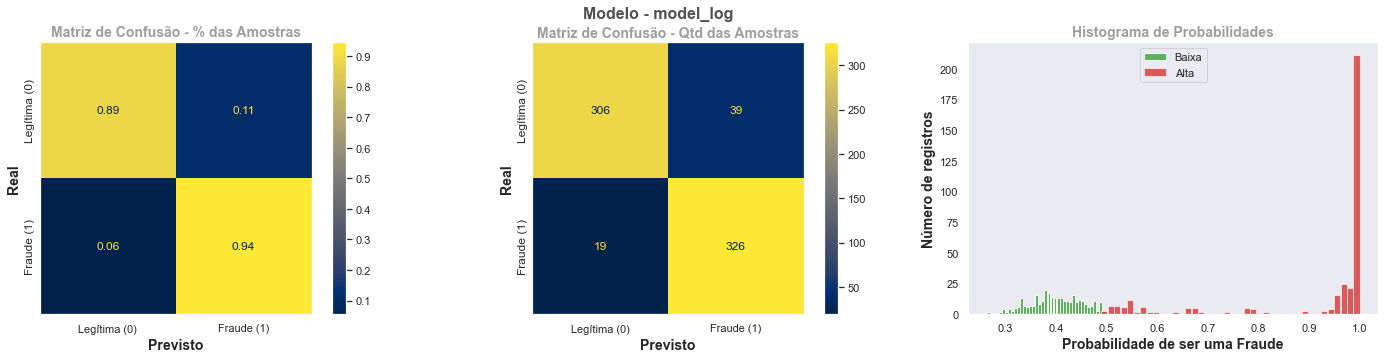

In [ ]:
# Relatorio de Classificação model_log
print('Relatório de Métricas de Avaliação'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_rus, y_hat, digits=4, target_names=target_names) + ('\n') + ('-' * 15))
# Recall
recall = recall_score(y_rus, y_hat)
print('Recall (model_log): {:.4f}\n'.format(recall))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_rus, y_hat)))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_rus, y_hat)))

# Plotar Matriz de Confusão
sns.set_theme(style="dark")
labels = ['Legítima (0)', 'Fraude (1)']
fig, ax = plt.subplots(1, 3, figsize=(25,5))
ConfusionMatrixDisplay.from_predictions(y_rus, y_hat, display_labels=labels, normalize='true', ax=ax[0], values_format='.2f', cmap='cividis')
ax[0].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[0].set_title('Matriz de Confusão - % das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

ConfusionMatrixDisplay.from_predictions(y_rus, y_hat, display_labels=labels, ax=ax[1], values_format='.0f', cmap='cividis')
ax[1].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[1].set_title('Matriz de Confusão - Qtd das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

# Histograma de Probabilidades
normal = y_proba_1[y_hat==0]
fraude = y_proba_1[y_hat==1]
n_bins_normal = np.histogram_bin_edges(normal, bins=40)
n_bins_fraude = np.histogram_bin_edges(fraude, bins=40)

sns.histplot(data=normal, ax=ax[2], color=cor_normal, bins=n_bins_normal, shrink=.95, label='Baixa')
sns.histplot(data=fraude, ax=ax[2], color=cor_fraude, bins=n_bins_fraude, shrink=.95, label='Alta')
ax[2].set_ylabel('')
ax[2].legend(loc='upper center')

ax[2].set_title('Histograma de Probabilidades',  fontsize=14, fontweight='bold', color=subtitle_color)
ax[2].set_xlabel('Probabilidade de ser uma Fraude', y=0.05, ha='center', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Número de registros', x=0.075, ha='center', fontsize=14, fontweight='bold')

plt.suptitle('Modelo - model_log', fontsize=16, fontweight='bold', color=title_color)

***Como foi o desempenho do nosso modelo?***

Conjunto de dados balanceado, onde existem 345 amostras tanto para a classe 0 (Transação Legítima) como para a classe 1 (Fraude).

Observando a Matriz de Confusão:
* Verdadeiros Positivos (Fraudes identificadas corretamente) - 94% de acertos (326 amostras)
* Falsos Negativos (Fraude identificada como Transação Legítima) - 6% de erros (19 amostras)
* Verdadeiros Negativos (Transações Legítimas identificadas corretamente) - 89% de acertos (306 amostras)
* Recall: 0.9449 - isso mostra, quando o modelo aponta se tratar de uma fraude, 94% das vezes, ele esta correto.

Através do histograma, vemos que nosso modelo quando identificou uma amostra como sendo Fraude, o fez com alta probabilidade de acerto, ficando a grande maioria das amostras na faixa entre 0.9 e 1.0

**Modelo model_log_pearson**

                Relatório de Métricas de Avaliação               
-----------------------------------------------------------------
              precision    recall  f1-score   support

Legitima (0)     0.9626    0.5217    0.6767       345
  Fraude (1)     0.6720    0.9797    0.7972       345

    accuracy                         0.7507       690
   macro avg     0.8173    0.7507    0.7369       690
weighted avg     0.8173    0.7507    0.7369       690

---------------
Recall (model_log_pearson): 0.9797

Acurácia: 0.7507

AUC: 0.7507



Text(0.5, 0.98, 'Modelo - model_log_pearson')

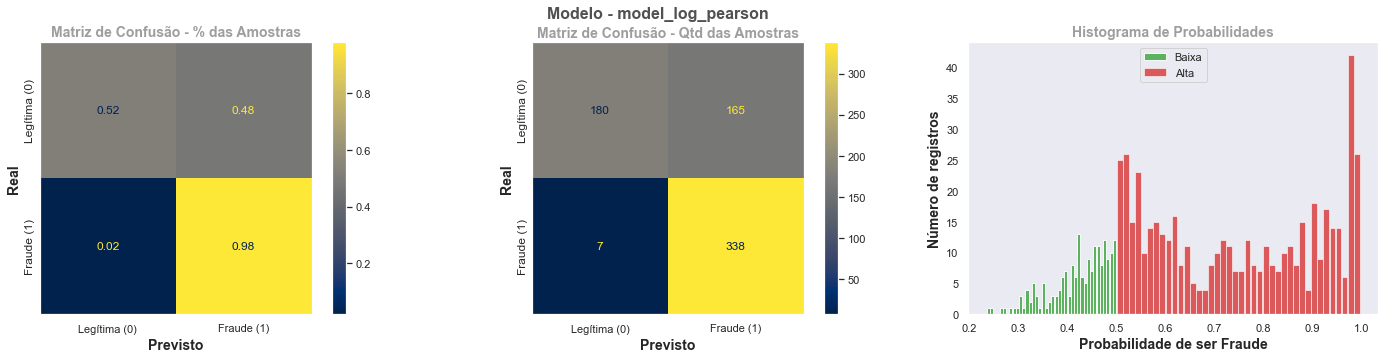

In [ ]:
# Relatorio de Classificação model_log_pearson
print('Relatório de Métricas de Avaliação'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_rus, y_hat_pearson, digits=4, target_names=target_names) + ('\n') + ('-' * 15))
# Recall
recall = recall_score(y_rus, y_hat_pearson)
print('Recall (model_log_pearson): {:.4f}\n'.format(recall))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_rus, y_hat_pearson)))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_rus, y_hat_pearson)))

# Plotar Matriz de Confusão
sns.set_theme(style="dark")
labels = ['Legítima (0)', 'Fraude (1)']
fig, ax = plt.subplots(1, 3, figsize=(25,5))
ConfusionMatrixDisplay.from_predictions(y_rus, y_hat_pearson, display_labels=labels, normalize='true', ax=ax[0], values_format='.2f', cmap='cividis')
ax[0].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[0].set_title('Matriz de Confusão - % das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

ConfusionMatrixDisplay.from_predictions(y_rus, y_hat_pearson, display_labels=labels, ax=ax[1], values_format='.0f', cmap='cividis')
ax[1].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[1].set_title('Matriz de Confusão - Qtd das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

# Histograma de Probabilidades
normal = y_proba_pearson_1[y_hat_pearson==0]
fraude = y_proba_pearson_1[y_hat_pearson==1]
n_bins_normal = np.histogram_bin_edges(normal, bins=40)
n_bins_fraude = np.histogram_bin_edges(fraude, bins=40)


sns.histplot(data=normal, ax=ax[2], color=cor_normal, bins=n_bins_normal, shrink=.95, label='Baixa')
sns.histplot(data=fraude, ax=ax[2], color=cor_fraude, bins=n_bins_fraude, shrink=.95, label='Alta')
ax[2].set_ylabel('')
ax[2].legend(loc='upper center')

ax[2].set_title('Histograma de Probabilidades',  fontsize=14, fontweight='bold', color=subtitle_color)
ax[2].set_xlabel('Probabilidade de ser Fraude', y=0.05, ha='center', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Número de registros', x=0.075, ha='center', fontsize=14, fontweight='bold')

plt.suptitle('Modelo - model_log_pearson', fontsize=16, fontweight='bold', color=title_color)

***Como foi o desempenho do nosso modelo?***

Conjunto de dados balanceado, onde existem 345 amostras tanto para a classe 0 (Transação Legítima) como para a classe 1 (Fraude).

Observando a Matriz de Confusão:
* Verdadeiros Positivos (Fraudes identificadas corretamente) - 98% de acertos (338 amostras)
* Falsos Negativos (Fraude identificada como Transação Legítima) - 2% de erros (7 amostras)
* Verdadeiros Negativos (Transações Legítimas identificadas corretamente) - 52% de acertos (180 amostras)
* Recall: 0.9797 - isso mostra, quando o modelo aponta se tratar de uma fraude, 98% das vezes, ele esta correto.

Através do histograma, vemos uma maior distribuição das probabilidades das amostras identificadas como Fraude. Houve uma quantidade razoável de amostras onde as probabilidades ficaram centradas em torno do valor limite de 0.5

**Modelo model_log_skb**

                Relatório de Métricas de Avaliação               
-----------------------------------------------------------------
              precision    recall  f1-score   support

Legitima (0)     0.9351    0.8348    0.8821       345
  Fraude (1)     0.8508    0.9420    0.8941       345

    accuracy                         0.8884       690
   macro avg     0.8929    0.8884    0.8881       690
weighted avg     0.8929    0.8884    0.8881       690

---------------
Recall (model_log_skb): 0.9420

Acurácia: 0.8884

AUC: 0.8884



Text(0.5, 0.98, 'Modelo - model_log_skb')

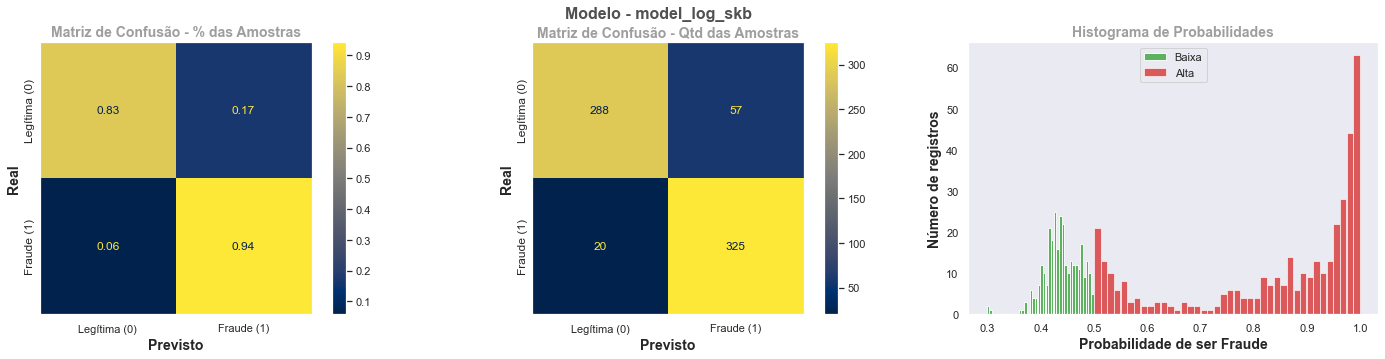

In [ ]:
# Relatorio de Classificação model_log_skb
print('Relatório de Métricas de Avaliação'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_rus, y_hat_skb, digits=4, target_names=target_names) + ('\n') + ('-' * 15))
# Recall
recall = recall_score(y_rus, y_hat_skb)
print('Recall (model_log_skb): {:.4f}\n'.format(recall))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_rus, y_hat_skb)))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_rus, y_hat_skb)))

# Plotar Matriz de Confusão
# sns.set_theme(style="white")
labels = ['Legítima (0)', 'Fraude (1)']
fig, ax = plt.subplots(1, 3, figsize=(25,5))
ConfusionMatrixDisplay.from_predictions(y_rus, y_hat_skb, display_labels=labels, normalize='true', ax=ax[0], values_format='.2f', cmap='cividis')
ax[0].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[0].set_title('Matriz de Confusão - % das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

ConfusionMatrixDisplay.from_predictions(y_rus, y_hat_skb, display_labels=labels, ax=ax[1], values_format='.0f', cmap='cividis')
ax[1].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[1].set_title('Matriz de Confusão - Qtd das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

# Histograma de Probabilidades
normal = y_proba_skb_1[y_hat_skb==0]
fraude = y_proba_skb_1[y_hat_skb==1]

n_bins_normal = np.histogram_bin_edges(normal, bins=40)
n_bins_fraude = np.histogram_bin_edges(fraude, bins=40)


sns.histplot(data=normal, ax=ax[2], color=cor_normal, bins=n_bins_normal, shrink=.95, label='Baixa')
sns.histplot(data=fraude, ax=ax[2], color=cor_fraude, bins=n_bins_fraude, shrink=.95, label='Alta')
ax[2].set_ylabel('')
ax[2].legend(loc='upper center')

ax[2].set_title('Histograma de Probabilidades',  fontsize=14, fontweight='bold', color=subtitle_color)
ax[2].set_xlabel('Probabilidade de ser Fraude', y=0.05, ha='center', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Número de registros', x=0.075, ha='center', fontsize=14, fontweight='bold')

plt.suptitle('Modelo - model_log_skb', fontsize=16, fontweight='bold', color=title_color)

***Como foi o desempenho do nosso modelo?***

Conjunto de dados balanceado, onde existem 345 amostras tanto para a classe 0 (Transação Legítima) como para a classe 1 (Fraude).

Observando a Matriz de Confusão:
* Verdadeiros Positivos (Fraudes identificadas corretamente) - 94% de acertos (325 amostras)
* Falsos Negativos (Fraude identificada como Transação Legítima) - 6% de erros (20 amostras)
* Verdadeiros Negativos (Transações Legítimas identificadas corretamente) - 83% de acertos (288 amostras)
* Recall: 0.9420 - isso mostra, quando o modelo aponta se tratar de uma fraude, 94% das vezes, ele esta correto.

Através do histograma, vemos que nosso modelo quando identificou uma amostra como sendo Fraude, o fez com alta probabilidade de acerto, ficando a grande maioria das amostras na faixa entre 0.9 e 1.0

#### Avaliação dos modelos utilizando o Conjunto de Dados de Teste

Finalizadas as etapas de testes de desempenho inicial, treinamento e otimização dos modelos com o conjunto de dados de Treinamento, iremos a seguir verificar a atuação desses modelos junto ao conjunto de dados de Teste.

**Separação entre variáveis e classe alvo**

In [ ]:
X_test = df_ccard_test.drop(columns=['Class'], axis=1)
y_test = df_ccard_test['Class']

In [ ]:
# Balanceamento dados
df_ccard_test.shape

(85442, 31)

In [ ]:
y_test.value_counts()

0    85295
1      147
Name: Class, dtype: int64

In [ ]:
# Criando o dataframe sem as features detectadas com colinearidade.
X_test_pearson = X_test.drop(columns=['V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7'], axis=1)

**Realizando as previsões e calculando as Probabilidades**

In [ ]:
# Realizar previsão com o Pipeline model_log - Regressão Logística
y_hat_test_log = model_log.best_estimator_.predict(X_test)
# Calcular as probabilidades das classes
y_proba_test_log_0, y_proba_test_log_1  = model_log.best_estimator_.predict_proba(X_test).T

In [ ]:
# Realizar previsão com o Pipeline model_log_pearson
y_hat_test_pearson = model_log_pearson.best_estimator_.predict(X_test_pearson)
# Calcular as probabilidades das classes
y_proba_test_pearson_0, y_proba_test_pearson_1 = model_log_pearson.best_estimator_.predict_proba(X_test_pearson).T

In [ ]:
# Realizar previsão com o Pipeline model_log_skb
y_hat_test_sbk = model_log_skb.best_estimator_.predict(X_test)
# Calcular as probabilidades das classes
y_proba_test_sbk_0, y_proba_test_sbk_1 = model_log_skb.best_estimator_.predict_proba(X_test).T

**Modelo model_log.best_estimator_**

                Relatório de Métricas de Avaliação               
-----------------------------------------------------------------
              precision    recall  f1-score   support

Legitima (0)     0.9999    0.8842    0.9385     85295
  Fraude (1)     0.0141    0.9592    0.0277       147

    accuracy                         0.8844     85442
   macro avg     0.5070    0.9217    0.4831     85442
weighted avg     0.9982    0.8844    0.9370     85442

---------------
Recall (model_log.best_estimator_): 0.9592

Acurácia: 0.8844

AUC: 0.9217



Text(0.5, 0.98, 'Modelo - model_log.best_estimator_')

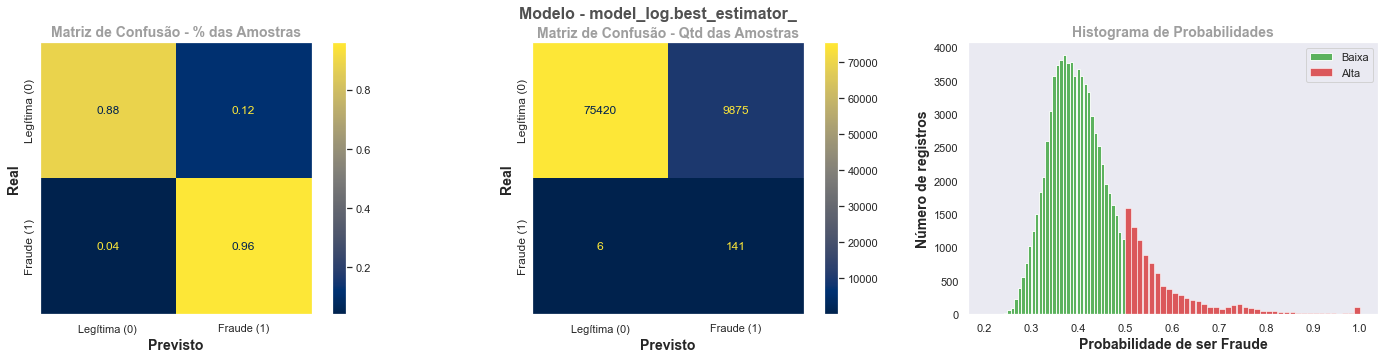

In [ ]:
# Relatorio de Classificação model_log.best_estimator_
print('Relatório de Métricas de Avaliação'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_test, y_hat_test_log, digits=4, target_names=target_names) + ('\n') + ('-' * 15))
# Recall
recall = recall_score(y_test, y_hat_test_log)
print('Recall (model_log.best_estimator_): {:.4f}\n'.format(recall))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_hat_test_log)))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_hat_test_log)))

# Plotar Matriz de Confusão
# sns.set_theme(style="white")
labels = ['Legítima (0)', 'Fraude (1)']
fig, ax = plt.subplots(1, 3, figsize=(25,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test_log, display_labels=labels, normalize='true', ax=ax[0], values_format='.2f', cmap='cividis')
ax[0].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[0].set_title('Matriz de Confusão - % das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test_log, display_labels=labels, ax=ax[1], values_format='.0f', cmap='cividis')
ax[1].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[1].set_title('Matriz de Confusão - Qtd das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

# Histograma de Probabilidades
normal = y_proba_test_log_1[y_hat_test_log==0]
fraude = y_proba_test_log_1[y_hat_test_log==1]

n_bins_normal = np.histogram_bin_edges(normal, bins=40)
n_bins_fraude = np.histogram_bin_edges(fraude, bins=40)


sns.histplot(data=normal, ax=ax[2], color=cor_normal, bins=n_bins_normal, shrink=.95, label='Baixa')
sns.histplot(data=fraude, ax=ax[2], color=cor_fraude, bins=n_bins_fraude, shrink=.95, label='Alta')
ax[2].set_ylabel('')
ax[2].legend(loc='best')

ax[2].set_title('Histograma de Probabilidades',  fontsize=14, fontweight='bold', color=subtitle_color)
ax[2].set_xlabel('Probabilidade de ser Fraude', y=0.05, ha='center', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Número de registros', x=0.075, ha='center', fontsize=14, fontweight='bold')

plt.suptitle('Modelo - model_log.best_estimator_', fontsize=16, fontweight='bold', color=title_color)

***Como foi o desempenho do nosso modelo?***

Lembrando que estamos lidando com um conjunto de dados desbalanceado, onde existem 85.295 amostras para a classe 0 (Transação Legítima) e 147 amostras para a classe 1 (Fraude).

Observando a Matriz de Confusão:
* Verdadeiros Positivos (Fraudes identificadas corretamente) - 96% de acertos (141 amostras)
* Falsos Negativos (Fraude identificada como Transação Legítima) - 4% de erros (6 amostras)
* Verdadeiros Negativos (Transações Legítimas identificadas corretamente) - 88% de acertos (75.480 amostras)
* Recall: 0.9592 - isso mostra, quando o modelo aponta se tratar de uma fraude, 96% das vezes, ele esta correto.

Através do histograma, vemos uma maior distribuição das probabilidades das amostras identificadas como Fraude. Houve uma quantidade razoável de amostras onde as probabilidades ficaram centradas em torno do valor limite de 0.5

**Modelo model_log_pearson.best_estimator_**

                Relatório de Métricas de Avaliação               
-----------------------------------------------------------------
              precision    recall  f1-score   support

Legitima (0)     0.9998    0.6784    0.8084     85295
  Fraude (1)     0.0050    0.9388    0.0100       147

    accuracy                         0.6789     85442
   macro avg     0.5024    0.8086    0.4092     85442
weighted avg     0.9981    0.6789    0.8070     85442

---------------
Recall (model_log_pearson.best_estimator_): 0.9388

Acurácia: 0.6789

AUC: 0.8086



Text(0.5, 0.98, 'Modelo - model_log_pearson.best_estimator_')

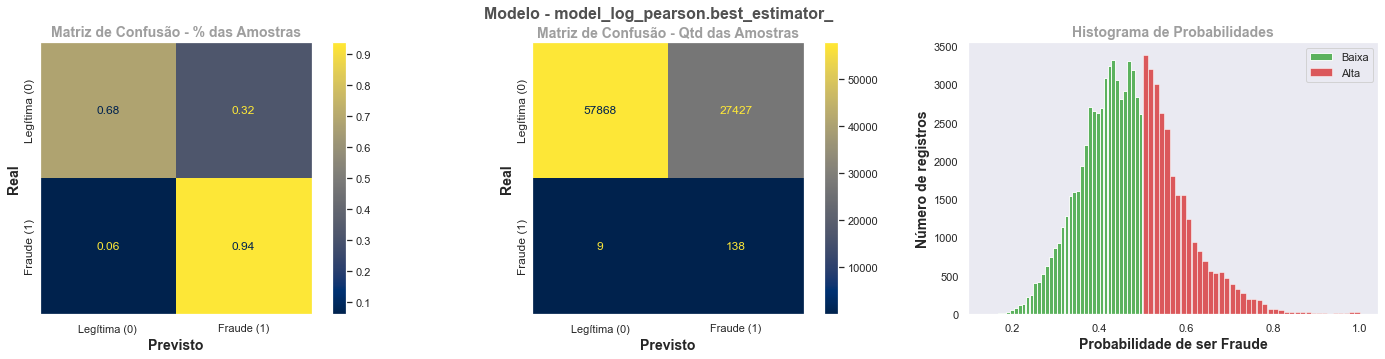

In [ ]:
# Relatorio de Classificação model_log_pearson.best_estimator_
print('Relatório de Métricas de Avaliação'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_test, y_hat_test_pearson, digits=4, target_names=target_names) + ('\n') + ('-' * 15))
# Recall
recall = recall_score(y_test, y_hat_test_pearson)
print('Recall (model_log_pearson.best_estimator_): {:.4f}\n'.format(recall))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_hat_test_pearson)))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_hat_test_pearson)))

# Plotar Matriz de Confusão
# sns.set_theme(style="white")
labels = ['Legítima (0)', 'Fraude (1)']
fig, ax = plt.subplots(1, 3, figsize=(25,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test_pearson, display_labels=labels, normalize='true', ax=ax[0], values_format='.2f', cmap='cividis')
ax[0].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[0].set_title('Matriz de Confusão - % das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test_pearson, display_labels=labels, ax=ax[1], values_format='.0f', cmap='cividis')
ax[1].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[1].set_title('Matriz de Confusão - Qtd das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

# Histograma de Probabilidades
normal = y_proba_test_pearson_1[y_hat_test_pearson==0]
fraude = y_proba_test_pearson_1[y_hat_test_pearson==1]

n_bins_normal = np.histogram_bin_edges(normal, bins=40)
n_bins_fraude = np.histogram_bin_edges(fraude, bins=40)


sns.histplot(data=normal, ax=ax[2], color=cor_normal, bins=n_bins_normal, shrink=.95, label='Baixa')
sns.histplot(data=fraude, ax=ax[2], color=cor_fraude, bins=n_bins_fraude, shrink=.95, label='Alta')
ax[2].set_ylabel('')
ax[2].legend(loc='best')

ax[2].set_title('Histograma de Probabilidades',  fontsize=14, fontweight='bold', color=subtitle_color)
ax[2].set_xlabel('Probabilidade de ser Fraude', y=0.05, ha='center', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Número de registros', x=0.075, ha='center', fontsize=14, fontweight='bold')

plt.suptitle('Modelo - model_log_pearson.best_estimator_', fontsize=16, fontweight='bold', color=title_color)

***Como foi o desempenho do nosso modelo?***

Lembrando que estamos lidando com um conjunto de dados desbalanceado, onde existem 85.295 amostras para a classe 0 (Transação Legítima) e 147 amostras para a classe 1 (Fraude).

Observando a Matriz de Confusão:
* Verdadeiros Positivos (Fraudes identificadas corretamente) - 94% de acertos (138 amostras)
* Falsos Negativos (Fraude identificada como Transação Legítima) - 6% de erros (9 amostras)
* Verdadeiros Negativos (Transações Legítimas identificadas corretamente) - 68% de acertos (57.858 amostras)
* Recall: 0.9388 - isso mostra, quando o modelo aponta se tratar de uma fraude, 94% das vezes, ele esta correto.

Através do histograma, vemos que a maioria das amostras identificadas como Fraude tiveram as probabilidades centradas em torno do valor limite de 0.5

**Modelo model_log_skb.best_estimator_**

                Relatório de Métricas de Avaliação               
-----------------------------------------------------------------
              precision    recall  f1-score   support

Legitima (0)     0.9998    0.9212    0.9589     85295
  Fraude (1)     0.0197    0.9184    0.0386       147

    accuracy                         0.9212     85442
   macro avg     0.5098    0.9198    0.4988     85442
weighted avg     0.9982    0.9212    0.9574     85442

---------------
Recall (model_log_skb.best_estimator_): 0.9184

Acurácia: 0.9212

AUC: 0.9198



Text(0.5, 0.98, 'Modelo - model_log_skb.best_estimator_')

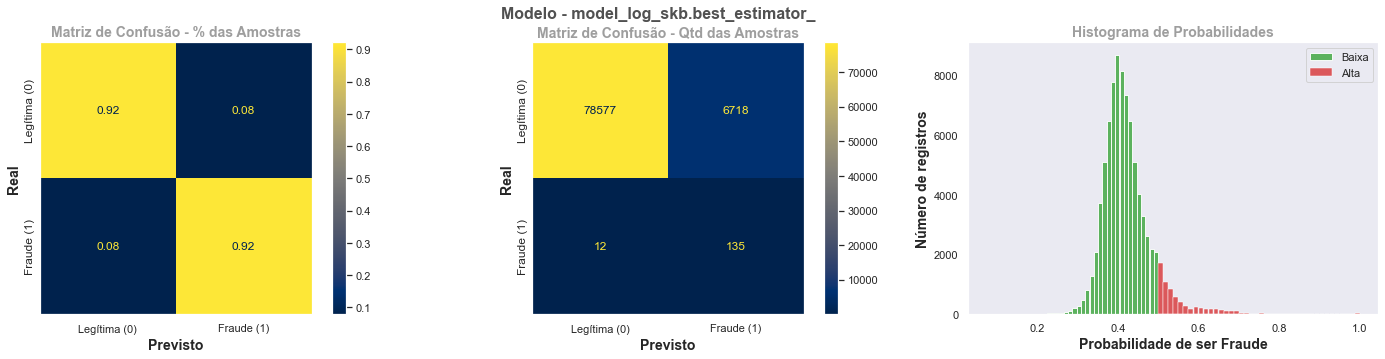

In [ ]:
# Relatorio de Classificação model_log_skb.best_estimator_
print('Relatório de Métricas de Avaliação'.center(65) + ('\n') + ('-' * 65))
print(classification_report(y_test, y_hat_test_sbk, digits=4, target_names=target_names) + ('\n') + ('-' * 15))
# Recall
recall = recall_score(y_test, y_hat_test_sbk)
print('Recall (model_log_skb.best_estimator_): {:.4f}\n'.format(recall))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_hat_test_sbk)))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_hat_test_sbk)))

# Plotar Matriz de Confusão
# sns.set_theme(style="white")
labels = ['Legítima (0)', 'Fraude (1)']
fig, ax = plt.subplots(1, 3, figsize=(25,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test_sbk, display_labels=labels, normalize='true', ax=ax[0], values_format='.2f', cmap='cividis')
ax[0].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[0].set_title('Matriz de Confusão - % das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test_sbk, display_labels=labels, ax=ax[1], values_format='.0f', cmap='cividis')
ax[1].set_xlabel('Previsto', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Real', fontsize=14, fontweight='bold')
ax[1].set_title('Matriz de Confusão - Qtd das Amostras', fontsize=14, fontweight='bold', color=subtitle_color)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 90, ha="center", va='center', fontsize=12)

# Histograma de Probabilidades
normal = y_proba_test_sbk_1[y_hat_test_sbk==0]
fraude = y_proba_test_sbk_1[y_hat_test_sbk==1]

n_bins_normal = np.histogram_bin_edges(normal, bins=40)
n_bins_fraude = np.histogram_bin_edges(fraude, bins=40)


sns.histplot(data=normal, ax=ax[2], color=cor_normal, bins=n_bins_normal, shrink=.95, label='Baixa')
sns.histplot(data=fraude, ax=ax[2], color=cor_fraude, bins=n_bins_fraude, shrink=.95, label='Alta')
ax[2].set_ylabel('')
ax[2].legend(loc='best')

ax[2].set_title('Histograma de Probabilidades',  fontsize=14, fontweight='bold', color=subtitle_color)
ax[2].set_xlabel('Probabilidade de ser Fraude', y=0.05, ha='center', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Número de registros', x=0.075, ha='center', fontsize=14, fontweight='bold')

plt.suptitle('Modelo - model_log_skb.best_estimator_', fontsize=16, fontweight='bold', color=title_color)

***Como foi o desempenho do nosso modelo?***

Lembrando que estamos lidando com um conjunto de dados desbalanceado, onde existem 85.295 amostras para a classe 0 (Transação Legítima) e 147 amostras para a classe 1 (Fraude).

Observando a Matriz de Confusão:
* Verdadeiros Positivos (Fraudes identificadas corretamente) - 92% de acertos (135 amostras)
* Falsos Negativos (Fraude identificada como Transação Legítima) - 8% de erros (12 amostras)
* Verdadeiros Negativos (Transações Legítimas identificadas corretamente) - 92% de acertos (78.596 amostras)
* Recall: 0.9184 - isso mostra, quando o modelo aponta se tratar de uma fraude, 92% das vezes, ele esta correto.

Através do histograma, vemos que a maioria das amostras identificadas como Fraude tiveram as probabilidades centradas em torno do valor limite de 0.5

### **Para finalizar...**

Como descrito no início desse projeto, o nosso desafio foi lidar com as transações fraudulentas com cartões de crédito, buscando identifica-las de forma eficaz.

***Nosso objetivo foi alcançado?***

Utilizando um conjunto de dados com operações anônimas realizadas no período de dois dias, tentamos criar mecanismos eficientes para detecção de fraudes.
Após todo processo de análise de dados e pré-processamento, partimos para escolha dos nossos algoritmos de aprendizado para classificação. Para isso, busquei seguir o tutorial do **scikit-learn** intitulado [***Choosing the right estimator***](https://scikit-learn.org/stable/tutorial/machine_learning_map/) para a seleção.

Para os testes iniciais de desempenho, foram escolhidos os estimadores LogisticRegression, LinearSVC e KNeighborsClassifier. Também foi criado um modelo simples baseado no algoritmo de LogisticRegression, com baixa complexidade e poder preditivo, que serviu de base comparativa para os outros modelos mais complexos.
Utilizamos o recurso de **Pipeline**, para auxiliar na organização de todas a etapas de produção dos nossos modelos de aprendizado.
Nessa avaliação inicial, com base na métrica **Recall**, o modelo que se destacou foi o que utilizou o algoritmo de LogisticRegression, obtendo o valor de **0.922358**

Com os testes iniciais finalizados e escolha de nosso melhor estimador, o que fizemos a seguir, para o nosso treinamento no conjunto de dados, foi realizar um aprimoramento desse nosso modelo, aplicando otimizações em seus hiperparâmetros e também técnicas de Feature Selection, onde selecionamos as melhores features, seja eliminando a colinearidade entre elas, com a correlação de Pearson ou selecionando as que possuiam maior relevância, com a função SelectKBest.
Novamente fazendo uso do recurso de pipeline, criamos três novos modelos, todos baseados no algoritmo de LogisticRegression: model_log (sem redução das features), model_log_pearson (com redução das features, eliminando a colinearidade entre elas), model_log_skb (seleção de features com maior relevância).

Na fase final, com os modelos já otimizados, verificamos a atuação desses junto ao conjunto de dados de Teste. Foram realizadas as previsões, e para avaliação do desempenho, além do Recall, foi utilizado a matriz de confusão. Podemos concluir que todos os modelos avaliados, tiveram um desempenho satisfatório, obtendo um Recall sempre acima de 92%, que representa o percentual de acerto quando o modelo aponta ser uma fraude. Para os casos de verdadeiros positivos, ou seja, fraudes identificadas corretamente, o desempenho foi na faixa entre 92% a 96%. No caso de falsos negativos, quando uma fraude é identificada como transação legítima, a taxa de erro não ultrapassou os 8%, e na melhor performance ficou em 4%.

Com esse projeto, ficou claro que os algoritmos de aprendizado de máquina devem ser amplamente utilizados para identificar padrões de fraude. Eles podem analisar grandes volumes de dados de transações passadas para detectar anomalias sutis e em constante evolução. Modelos de machine learning podem ser treinados para reconhecer comportamentos fraudulentos com base em características como localização, valor da transação, tipo de estabelecimento, histórico de transações do titular do cartão, entre outros.
Em geral, a detecção de fraudes em cartões de crédito envolve uma combinação de abordagens técnicas e análises de padrões de comportamento para identificar transações suspeitas e proteger os consumidores e as instituições financeiras contra atividades fraudulentas.